In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score



In [688]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
cons = pd.read_csv('concerts.csv')
cons_new = pd.read_csv('concerts_2014-15.csv')
subs = pd.read_csv('subscriptions.csv')
tickets = pd.read_csv('tickets_all.csv')
zipcodes = pd.read_csv('zipcodes.csv')
account = pd.read_csv('account.csv',encoding='latin-1')

# Check Data

In [3]:
train.head()

,account.id,label
0,001i000000NuRo3,0
1,001i000000NuRxd,0
2,001i000000NuQGN,0
3,001i000000NuPfL,0
4,001i000000NuQkP,0


In [4]:
account.head()

,account.id,shipping.zip.code,billing.zip.code,shipping.city,billing.city,relationship,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,first.donated
0,001i000000LhSrQ,94102,94102,San Francisco,San Francisco,NaN,0.0,0.0,0,NaN
1,001i000000LhyPD,NaN,94303,NaN,Palo Alto,NaN,0.0,500.0,5,1987-07-04 00:00:00
2,001i000000LhyPE,NaN,94597,NaN,Walnut Creek,NaN,0.0,783.0,7,2008-06-02 00:00:00
3,001i000000LhyPF,NaN,94610,NaN,Oakland,NaN,1500.0,28435.0,28,1986-07-04 00:00:00
4,001i000000LhyPG,NaN,94024,NaN,Los Altos,NaN,300.0,4969.0,16,1997-04-07 00:00:00


In [5]:
pd.isna(account['shipping.zip.code']).sum()

19569

In [6]:
pd.isna(account['billing.zip.code']).sum()

2955

In [7]:
((pd.isna(account['billing.zip.code']) == True) & (pd.isna(account['shipping.zip.code'])==False)).sum()

3

In [8]:
zipcodes

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
0,705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,False,NaN,NaN,NaN
1,610,STANDARD,ANASCO,PR,PRIMARY,18.28,-67.14,NA-US-PR-ANASCO,False,NaN,NaN,NaN
2,611,PO BOX,ANGELES,PR,PRIMARY,18.28,-66.79,NA-US-PR-ANGELES,False,NaN,NaN,NaN
3,612,STANDARD,ARECIBO,PR,PRIMARY,18.45,-66.73,NA-US-PR-ARECIBO,False,NaN,NaN,NaN
4,601,STANDARD,ADJUNTAS,PR,PRIMARY,18.16,-66.72,NA-US-PR-ADJUNTAS,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
42517,34009,MILITARY,APO,AA,PRIMARY,NaN,NaN,SA-GY-NEW HORIZON-GUYANA,True,NaN,NaN,NaN
42518,34010,MILITARY,APO,AA,PRIMARY,NaN,NaN,CA-HN-NEW HORIZON LA CEIBA - COMAYAGUA,True,NaN,NaN,NaN
42519,34001,MILITARY,APO,AA,PRIMARY,NaN,NaN,CA-NI-JTF JUNTOS PODEMOS BASE CAMP,True,NaN,NaN,NaN
42520,34071,MILITARY,APO,AA,PRIMARY,NaN,NaN,SA-PY-JTF NEW HORIZON-CONCEPCION,True,NaN,NaN,NaN


In [9]:
cons.head()

,season,concert.name,set,who,what,location
0,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Peninsula
1,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Berkeley Sunday
2,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",San Francisco
3,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Berkeley Saturday
4,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Contra Costa


In [10]:
cons['what'].unique()

array(["MOZART: Incidental Music from Thamos, King of Egypt, K. 345\rMOZART: Concerto for Fortepiano No. 20 in D minor, K. 466\rLEVIN: Improvisations on themes submitted by the audience\rMOZART/LEVIN: Concerto Movement in G major from Nannerl's Music\rBook, NMA No. 51 (newly attributed to Mozart, US Premiere)\rLEVIN: Variations on themes submitted by the audience\rMOZART:Symphony No. 41 in C major, K. 551 Jupiter\x9d",
       'BachÕs Wedding Cantata\rBACH\rOrchestral Suite No. 1 in C major, BWV 1066\rConcerto for Harpsichord in D minor, BWV 1052\rÒWeichet nur, betrubte SchattenÓ (The Wedding Cantata), BWV 202\rConcerto for Harpsichord in D major, BWV 1054',
       'VivaldiÕs Four Seasons\rCORELLI: Concerto Grosso Op. 6, No. 11 in B-flat major\rPERGOLESI: Sinfonia in F major\rVIVALDI: Le Quattro stagioni (The Four Seasons). Op. 8, Nos. 1-4\rDURANTE: Concerto No. 5 in A major\rZAVATERI: Concerto decimo a Pastorale, Op. 1',
       'HANDEL Messiah',
       'TELEMANN: Concerto for Two Horns

In [11]:
cons_new

,season,concert.name,set,who,what
0,2014-2015,"Steven Isserlis, Boccherini, and Haydn",1,"Nicholas McGegan, conductor, Steven Isserlis, ...",BOCCHERINIConcerto for Violoncello No. 7 in G ...
1,2014-2015,"Andreas Scholl, J.S. Bach, and Handel",2,"Julian Wachner, conductor, Andreas Scholl, cou...",HANDELArias including ÒVa tacitoÓ from Giulio ...
2,2014-2015,Vivaldi and Zelenka: A Joyous Christmas,3,"Nicholas McGegan, conductor, Dominique Labelle...","VIVALDI Dixit Dominus, RV 807 ZELENKA Missa Na..."
3,2014-2015,The Cousins Bach,4,"Nicholas McGegan, conductor Sherezade Panthaki...","Johann Ludwig BACH, Trauermusik, Johann Christ..."
4,2014-2015,Rachel Podger and Vivaldi,5,"Rachel Podger, violin and leader",VIVALDI Violin concertos from LÕestro armonico...
5,2014-2015,RossiniÕs The Marriage Contract,6,"Nicholas McGegan, conductor Soloists from San ...",ROSSINI La cambiale di matrimonio (The Marriag...


In [12]:
tickets.head()

,account.id,price.level,no.seats,marketing.source,season,location,set,multiple.tickets
0,001i000000NuOP0,4,2,NaN,2012-2013,San Francisco,4.0,no
1,001i000000NuOYU,1,1,Other,2013-2014,Berkeley Sunday,6.0,no
2,001i000000NuRS9,4,2,NaN,2011-2012,Family concert,3.0,no
3,001i000000NuRPj,3,1,Postcard or brochure,2013-2014,Berkeley Saturday,2.0,no
4,001i000000NuRQ1,2,2,NaN,2013-2014,Berkeley Saturday,1.0,no


In [13]:
tickets['season'].unique()

array(['2012-2013', '2013-2014', '2011-2012', '2010-2011'], dtype=object)

In [14]:
subs

,account.id,season,package,no.seats,location,section,price.level,subscription_tier,multiple.subs
0,001i000000LhyR3,2009-2010,Quartet,2,San Francisco,Premium Orchestra,1.0,1.0,no
1,001i000000NuOeY,2000-2001,Full,2,San Francisco,Orchestra,2.0,2.0,no
2,001i000000NuNvb,2001-2002,Full,2,Berkeley Saturday,Balcony Front,3.0,2.0,no
3,001i000000NuOIz,1993-1994,Quartet,1,Contra Costa,Orchestra,2.0,0.5,no
4,001i000000NuNVE,1998-1999,Full,2,Berkeley Sunday,Balcony Rear,4.0,2.0,no
...,...,...,...,...,...,...,...,...,...
28622,001i000000NuOE8,1994-1995,Full,3,Santa Rosa,Balcony,4.0,3.0,no
28623,001i000000NuPnA,2006-2007,Full,2,Peninsula,Balcony Front,3.0,2.0,no
28624,001i000000Lhyc6,2009-2010,Full,4,San Francisco,Dress Circle,3.0,4.0,no
28625,001i000000NuOhT,1995-1996,Full,2,Santa Rosa,Balcony,4.0,2.0,no


In [15]:
subs['account.id'].describe()

count               28627
unique               6267
top       001i000000LhyQD
freq                   21
Name: account.id, dtype: object

In [16]:
account.dtypes

account.id                  object
shipping.zip.code           object
billing.zip.code            object
shipping.city               object
billing.city                object
relationship                object
amount.donated.2013        float64
amount.donated.lifetime    float64
no.donations.lifetime        int64
first.donated               object
dtype: object

In [17]:
zipcodes.dtypes

Zipcode                  int64
ZipCodeType             object
City                    object
State                   object
LocationType            object
Lat                    float64
Long                   float64
Location                object
Decommisioned             bool
TaxReturnsFiled        float64
EstimatedPopulation    float64
TotalWages             float64
dtype: object

# Clean Data and Manipulate Data

## Merge account and zipcodes

In [689]:
zipcodes.sort_values(by=['Zipcode'],ascending=True,inplace=True)
# zipcodes.fillna(method="ffill",inplace=True)

In [690]:
zipcodes['Zipcode'] = zipcodes['Zipcode'].astype(str)

In [691]:
zipcodes[zipcodes['Lat'].isnull()]

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
41925,9001,MILITARY,APO,AE,PRIMARY,NaN,NaN,NA-US-,True,NaN,NaN,NaN
41329,9002,MILITARY,APO,AE,PRIMARY,NaN,NaN,EU-DE-AMERICAN ARMS HOTEL,False,NaN,NaN,NaN
41330,9003,MILITARY,APO,AE,PRIMARY,NaN,NaN,NA-US-,False,NaN,NaN,NaN
41331,9004,MILITARY,APO,AE,PRIMARY,NaN,NaN,NA-US-,False,NaN,NaN,NaN
41332,9005,MILITARY,APO,AE,PRIMARY,NaN,NaN,EU-DE-WEISBADEN AAF OMDC,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
41885,96682,MILITARY,FPO,AP,PRIMARY,NaN,NaN,NA-US-,False,NaN,NaN,NaN
41886,96683,MILITARY,FPO,AP,PRIMARY,NaN,NaN,NA-US-,False,NaN,NaN,NaN
41887,96686,MILITARY,FPO,AP,PRIMARY,NaN,NaN,NA-US-,False,NaN,NaN,NaN
41888,96687,MILITARY,FPO,AP,PRIMARY,NaN,NaN,NA-US-,False,NaN,NaN,NaN


In [692]:
zipcodes[zipcodes['Zipcode']=='9001']

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
41925,9001,MILITARY,APO,AE,PRIMARY,NaN,NaN,NA-US-,True,NaN,NaN,NaN


In [693]:
pd.isna(zipcodes).sum()

Zipcode                    0
ZipCodeType                0
City                       0
State                      0
LocationType               0
Lat                      648
Long                     648
Location                   1
Decommisioned              0
TaxReturnsFiled        13643
EstimatedPopulation    13643
TotalWages             13678
dtype: int64

In [694]:
pd.isna(account).sum()

account.id                     0
shipping.zip.code          19569
billing.zip.code            2955
shipping.city              19561
billing.city                2218
relationship               19172
amount.donated.2013            0
amount.donated.lifetime        0
no.donations.lifetime          0
first.donated              14298
dtype: int64

In [695]:
df1 = pd.merge(account,zipcodes, how='left',left_on='billing.zip.code', right_on='Zipcode').drop('Zipcode',axis=1)

In [696]:
df1.columns

Index(['account.id', 'shipping.zip.code', 'billing.zip.code', 'shipping.city',
       'billing.city', 'relationship', 'amount.donated.2013',
       'amount.donated.lifetime', 'no.donations.lifetime', 'first.donated',
       'ZipCodeType', 'City', 'State', 'LocationType', 'Lat', 'Long',
       'Location', 'Decommisioned', 'TaxReturnsFiled', 'EstimatedPopulation',
       'TotalWages'],
      dtype='object')

In [697]:
df1.drop('shipping.zip.code',axis=1,inplace=True)
df1.drop('shipping.city',axis=1,inplace=True)

In [698]:
df1['relationship'].unique()

array([nan, 'Other', 'Education Participant', 'Vendor - Artistic',
       'Peer Organization', 'Vendor - Artistic; Peer Organization',
       'Vendor - Marketing', 'Vendor - Marketing; Other',
       'Vendor - General', 'Corporation', 'Foundation'], dtype=object)

In [699]:
df1.head()

,account.id,billing.zip.code,billing.city,relationship,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,first.donated,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
0,001i000000LhSrQ,94102,San Francisco,NaN,0.0,0.0,0,NaN,STANDARD,SAN FRANCISCO,CA,PRIMARY,37.77,-122.41,NA-US-CA-SAN FRANCISCO,False,12542.0,16733.0,4.808331e+08
1,001i000000LhyPD,94303,Palo Alto,NaN,0.0,500.0,5,1987-07-04 00:00:00,STANDARD,PALO ALTO,CA,PRIMARY,37.45,-122.10,NA-US-CA-PALO ALTO,False,18392.0,34099.0,1.243741e+09
2,001i000000LhyPE,94597,Walnut Creek,NaN,0.0,783.0,7,2008-06-02 00:00:00,STANDARD,WALNUT CREEK,CA,PRIMARY,37.91,-122.07,NA-US-CA-WALNUT CREEK,False,10755.0,16977.0,6.592431e+08
3,001i000000LhyPF,94610,Oakland,NaN,1500.0,28435.0,28,1986-07-04 00:00:00,STANDARD,OAKLAND,CA,PRIMARY,37.81,-122.24,NA-US-CA-OAKLAND,False,16601.0,24162.0,1.004840e+09
4,001i000000LhyPG,94024,Los Altos,NaN,300.0,4969.0,16,1997-04-07 00:00:00,STANDARD,LOS ALTOS,CA,PRIMARY,37.34,-122.11,NA-US-CA-LOS ALTOS,False,10923.0,20665.0,1.585532e+09


In [700]:
pd.isna(df1).sum()

account.id                     0
billing.zip.code            2955
billing.city                2218
relationship               19172
amount.donated.2013            0
amount.donated.lifetime        0
no.donations.lifetime          0
first.donated              14298
ZipCodeType                 3515
City                        3515
State                       3515
LocationType                3515
Lat                         3516
Long                        3516
Location                    3515
Decommisioned               3515
TaxReturnsFiled             3638
EstimatedPopulation         3638
TotalWages                  4154
dtype: int64

In [701]:
for i in ["TaxReturnsFiled","EstimatedPopulation",'TotalWages','Lat','Long']:
    df1[i] = df1[i].fillna(df1.groupby('State')[i].transform('median'))

In [702]:
def onehot_encode(X,cols):
    # Treat new categories as a new 'unknown' category (all onehot columns are 0)
    onehot_enc = OneHotEncoder(handle_unknown='ignore')
    # Fit encoder on training data
    onehot_enc.fit(X[cols])
    # Get the names of the new columns created
    colnames = columns=list(onehot_enc.get_feature_names(input_features=cols))
    # Transform the data
    onehot_vals = onehot_enc.transform(X[cols]).toarray()
    # Put transformed data into dataframe
    enc_df = pd.DataFrame(onehot_vals,columns=colnames,index=X.index)
    # Add onehot columns back onto original dataframe and drop the original columns
    X = pd.concat([X,enc_df],axis=1).drop(cols,axis=1)
    return X,onehot_enc

In [703]:
df1['relationship'].fillna('Other',inplace=True)

In [704]:
# from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
# onehotcols = ['relationship']
# df1, onehot_enc = onehot_encode(df1,onehotcols)

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [705]:
df1.columns

Index(['account.id', 'billing.zip.code', 'billing.city', 'amount.donated.2013',
       'amount.donated.lifetime', 'no.donations.lifetime', 'first.donated',
       'ZipCodeType', 'City', 'State', 'LocationType', 'Lat', 'Long',
       'Location', 'Decommisioned', 'TaxReturnsFiled', 'EstimatedPopulation',
       'TotalWages', 'relationship_Corporation',
       'relationship_Education Participant', 'relationship_Foundation',
       'relationship_Other', 'relationship_Peer Organization',
       'relationship_Vendor - Artistic',
       'relationship_Vendor - Artistic; Peer Organization',
       'relationship_Vendor - General', 'relationship_Vendor - Marketing',
       'relationship_Vendor - Marketing; Other'],
      dtype='object')

In [706]:
df1['reltionship_Vendor'] =  df1['relationship_Vendor - Artistic']+\
       df1['relationship_Vendor - Artistic; Peer Organization']+\
       df1['relationship_Vendor - General']+\
        df1['relationship_Vendor - Marketing']+\
       df1['relationship_Vendor - Marketing; Other']

In [707]:
df1=df1[['account.id', 'billing.zip.code', 'billing.city', 'amount.donated.2013',
       'amount.donated.lifetime', 'no.donations.lifetime', 'first.donated',
       'ZipCodeType', 'City', 'State', 'LocationType', 'Lat', 'Long',
       'Location', 'Decommisioned', 'TaxReturnsFiled', 'EstimatedPopulation',
       'TotalWages', 'relationship_Corporation',
       'relationship_Education Participant', 'relationship_Foundation',
       'relationship_Other', 'relationship_Peer Organization',
        'reltionship_Vendor']]

In [186]:
df1.shape

(19833, 19)

In [187]:
account.shape

(19833, 10)

## Combine subscription and tickets

In [188]:
# subs[subs['account.id']=='001i000000LhyS3']
subs[subs['account.id']=='001i000000LhyTz']

,account.id,season,package,no.seats,location,section,price.level,subscription_tier,multiple.subs
739,001i000000LhyTz,1994-1995,Full,4,Peninsula,Balcony,4.0,4.0,yes
915,001i000000LhyTz,2010-2011,Full,4,Berkeley Sunday,Orchestra,0.0,4.0,yes
2007,001i000000LhyTz,2001-2002,Full,2,San Francisco,Orchestra,2.0,2.0,no
3529,001i000000LhyTz,2003-2004,Full,1,San Francisco,NaN,NaN,1.0,no
6779,001i000000LhyTz,2011-2012,Full,4,Berkeley Sunday,Orchestra,0.0,4.0,yes
6908,001i000000LhyTz,1995-1996,Full,2,San Francisco,Orchestra,2.0,2.0,no
7961,001i000000LhyTz,2013-2014,Full,4,San Francisco,NaN,0.0,4.0,yes
9130,001i000000LhyTz,1999-2000,Full,2,San Francisco,Orchestra,2.0,2.0,no
9605,001i000000LhyTz,1998-1999,Full,2,San Francisco,Orchestra,2.0,2.0,no
10015,001i000000LhyTz,1996-1997,Full,2,San Francisco,Orchestra,2.0,2.0,no


In [189]:
subs[subs['multiple.subs']=='yes']

,account.id,season,package,no.seats,location,section,price.level,subscription_tier,multiple.subs
70,001i000000LhyS3,2013-2014,Full,2,San Francisco,NaN,4.0,2.0,yes
739,001i000000LhyTz,1994-1995,Full,4,Peninsula,Balcony,4.0,4.0,yes
743,001i000000LhyVI,2012-2013,Trio B,4,Peninsula,Orchestra,1.0,2.0,yes
915,001i000000LhyTz,2010-2011,Full,4,Berkeley Sunday,Orchestra,0.0,4.0,yes
916,001i000000LhyPU,2010-2011,Full,3,Berkeley Saturday,Orchestra,0.0,3.0,yes
...,...,...,...,...,...,...,...,...,...
25668,001i000000Lhydp,2013-2014,Trio B,4,Peninsula,NaN,1.0,2.0,yes
25839,001i000000NuOQV,2010-2011,Full,5,Berkeley Sunday,Orchestra,0.0,5.0,yes
26940,001i000000NuNvT,1994-1995,Full,3,Berkeley Sunday,Balcony Front,3.0,3.0,yes
27144,001i000000LhyZ7,2013-2014,Trio A,2,Berkeley Saturday,NaN,0.0,1.0,yes


In [190]:
tickets.head()

,account.id,price.level,no.seats,marketing.source,season,location,set,multiple.tickets
0,001i000000NuOP0,4,2,NaN,2012-2013,San Francisco,4.0,no
1,001i000000NuOYU,1,1,Other,2013-2014,Berkeley Sunday,6.0,no
2,001i000000NuRS9,4,2,NaN,2011-2012,Family concert,3.0,no
3,001i000000NuRPj,3,1,Postcard or brochure,2013-2014,Berkeley Saturday,2.0,no
4,001i000000NuRQ1,2,2,NaN,2013-2014,Berkeley Saturday,1.0,no


In [191]:
subs_account = subs['account.id']
tickets_account = tickets['account.id']
c = [x for x in subs_account if x in tickets_account]
c

[]

In [708]:
subs['sub_flag'] = 1
tickets['tic_flag'] = 1

In [193]:
pd.isna(subs['price.level']).sum()

3534

In [194]:
pd.isna(subs['no.seats']).sum()

0

In [709]:
subs.sort_values(by=['account.id','season'],ascending=True)

,account.id,season,package,no.seats,location,section,price.level,subscription_tier,multiple.subs,sub_flag
3761,001i000000LhyPD,1993-1994,Full,2,San Francisco,Orchestra,2.0,2.0,no,1
15816,001i000000LhyPD,1994-1995,Full,2,San Francisco,Orchestra,2.0,2.0,no,1
16084,001i000000LhyPD,1995-1996,Full,2,San Francisco,Orchestra,2.0,2.0,no,1
13940,001i000000LhyPD,1996-1997,Full,2,San Francisco,Orchestra,2.0,2.0,no,1
16729,001i000000LhyPD,1997-1998,Full,2,San Francisco,Orchestra,2.0,2.0,no,1
...,...,...,...,...,...,...,...,...,...,...
6288,001i000000V23aW,2013-2014,CYO,2,Peninsula,NaN,3.0,1.0,no,1
24550,001i000000V24lZ,2013-2014,CYO,2,Berkeley Sunday,NaN,2.0,1.0,no,1
20615,001i000000V24u1,2013-2014,CYO,1,Berkeley Saturday,NaN,3.0,0.5,no,1
14594,001i000000V255R,2013-2014,CYO,2,Berkeley Saturday,NaN,2.0,1.0,no,1


In [196]:
pd.isna(tickets).sum()

account.id             0
price.level          208
no.seats               0
marketing.source    2224
season                 0
location              44
set                   22
multiple.tickets       0
flag                   0
dtype: int64

In [197]:
pd.isna(subs).sum()

account.id              0
season                  0
package                 6
no.seats                0
location                6
section              4543
price.level          3534
subscription_tier       0
multiple.subs           0
flag                    0
dtype: int64

In [198]:
tickets['price.level'].unique()

array(['4', '1', '3', '2', nan, '0', 'Adult', 'Youth', 'GA', '4.0'],
      dtype=object)

In [710]:
tickets['price.level'].replace(['Adult','Youth', 'GA'],np.nan,inplace=True)

In [711]:
tickets.sort_values(by=['account.id','season'],ascending=True,inplace=True)

In [201]:
subs

,account.id,season,package,no.seats,location,section,price.level,subscription_tier,multiple.subs,flag
0,001i000000LhyR3,2009-2010,Quartet,2,San Francisco,Premium Orchestra,1.0,1.0,no,2
1,001i000000NuOeY,2000-2001,Full,2,San Francisco,Orchestra,2.0,2.0,no,2
2,001i000000NuNvb,2001-2002,Full,2,Berkeley Saturday,Balcony Front,3.0,2.0,no,2
3,001i000000NuOIz,1993-1994,Quartet,1,Contra Costa,Orchestra,2.0,0.5,no,2
4,001i000000NuNVE,1998-1999,Full,2,Berkeley Sunday,Balcony Rear,4.0,2.0,no,2
...,...,...,...,...,...,...,...,...,...,...
28622,001i000000NuOE8,1994-1995,Full,3,Santa Rosa,Balcony,4.0,3.0,no,2
28623,001i000000NuPnA,2006-2007,Full,2,Peninsula,Balcony Front,3.0,2.0,no,2
28624,001i000000Lhyc6,2009-2010,Full,4,San Francisco,Dress Circle,3.0,4.0,no,2
28625,001i000000NuOhT,1995-1996,Full,2,Santa Rosa,Balcony,4.0,2.0,no,2


In [712]:
for i in [tickets,subs]:
    i['price.level'] = i['price.level'].astype(float)
    i['price.level'].fillna(i.groupby('account.id')['price.level'].transform('median'),inplace=True)
    i['price.level'].fillna(i['price.level'].median(),inplace=True)

In [713]:
tickets['sum'] = tickets['no.seats']*tickets['price.level']
subs['sum'] = subs['no.seats']*subs['price.level']

In [714]:
pack = subs.groupby(['account.id','package']).count()['season'].reset_index()

In [715]:
pack = pd.pivot_table(pack, index='account.id', columns='package', values = 'season')
pack.fillna(0,inplace=True)

In [716]:
subs

,account.id,season,package,no.seats,location,section,price.level,subscription_tier,multiple.subs,sub_flag,sum
0,001i000000LhyR3,2009-2010,Quartet,2,San Francisco,Premium Orchestra,1.0,1.0,no,1,2.0
1,001i000000NuOeY,2000-2001,Full,2,San Francisco,Orchestra,2.0,2.0,no,1,4.0
2,001i000000NuNvb,2001-2002,Full,2,Berkeley Saturday,Balcony Front,3.0,2.0,no,1,6.0
3,001i000000NuOIz,1993-1994,Quartet,1,Contra Costa,Orchestra,2.0,0.5,no,1,2.0
4,001i000000NuNVE,1998-1999,Full,2,Berkeley Sunday,Balcony Rear,4.0,2.0,no,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...
28622,001i000000NuOE8,1994-1995,Full,3,Santa Rosa,Balcony,4.0,3.0,no,1,12.0
28623,001i000000NuPnA,2006-2007,Full,2,Peninsula,Balcony Front,3.0,2.0,no,1,6.0
28624,001i000000Lhyc6,2009-2010,Full,4,San Francisco,Dress Circle,3.0,4.0,no,1,12.0
28625,001i000000NuOhT,1995-1996,Full,2,Santa Rosa,Balcony,4.0,2.0,no,1,8.0


In [717]:
pack['Full'] = pack['Full']+pack['Full upgrade']
pack['Quartet'] =pack['Quartet']+pack['Quartet A']+pack['Quartet B']+pack['Quartet CC']
pack['Trio'] =pack['Trio']+pack['Trio A']+pack['Trio B']
pack = pack[['CYO','Full','Quartet','Trio']]

In [718]:
multi = subs.groupby(['account.id','multiple.subs']).count()['season'].reset_index()
multi = pd.pivot_table(multi, index='account.id', columns='multiple.subs', values = 'season')
multi.fillna(0,inplace=True)
multi['perc'] = multi['yes']/(multi['yes']+multi['no'])
multi = multi[['perc']]

In [719]:
section = subs.groupby(['account.id','section']).count()['season'].reset_index()
section = pd.pivot_table(section, index='account.id', columns='section', values = 'season')
section.fillna(0,inplace=True)
section

section,Balcony,Balcony Front,Balcony Rear,Box,Boxes House Left,Boxes House Right,Dress Circle,Floor,Gallery,Orchestra,Orchestra Front,Orchestra Rear,Premium Orchestra,Santa Rosa
account.id,,,,,,,,,,,,,,
001i000000LhyPD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
001i000000LhyPE,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
001i000000LhyPF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,4.0,0.0
001i000000LhyPG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,0.0,4.0,0.0
001i000000LhyPH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
001i000000Q3NtA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001i000000Q3NtP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
001i000000Q3Ntx,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0


In [720]:
section['Balcony'] = section['Balcony Front']+section['Balcony Rear']
section['Box'] =section['Box']+section['Boxes House Left']+section['Boxes House Right']
section['Orchestra'] =section['Orchestra']+section['Orchestra Front']+section['Orchestra Rear']+section['Premium Orchestra']
section = section[['Balcony','Box','Orchestra','Dress Circle','Floor','Gallery','Santa Rosa']]

In [722]:
sub_mean = subs.groupby(['account.id']).mean()[['price.level','sub_flag','subscription_tier']]
sub_sum = subs.groupby(['account.id']).sum()[['no.seats','sum']]
sub_count = subs.groupby(['account.id']).count()[['season']]

sub_stat = sub_mean.join(sub_sum)
sub_stat = sub_stat.join(sub_count)

sub_stat.rename(columns={"season": "seasons"},inplace=True)
sub_stat = sub_stat.join(pack)
sub_stat = sub_stat.join(multi)
sub_stat = sub_stat.join(section)

In [547]:
sub_stat.head()

,price.level,subscription_tier,flag,no.seats,sum,seasons,CYO,Full,Quartet,Trio,no,yes,Balcony,Box,Orchestra,Dress Circle,Floor,Gallery,Santa Rosa
account.id,,,,,,,,,,,,,,,,,,,
001i000000LhyPD,2.416667,1.833333,2.0,2.000000,4.833333,12,0.0,10.0,1.0,1.0,12.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
001i000000LhyPE,2.500000,1.250000,2.0,2.166667,5.500000,6,0.0,1.0,3.0,2.0,5.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0
001i000000LhyPF,1.157895,1.842105,2.0,1.842105,2.157895,19,0.0,19.0,0.0,0.0,19.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
001i000000LhyPG,1.062500,1.812500,2.0,1.875000,2.000000,16,0.0,15.0,0.0,1.0,16.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
001i000000LhyPH,1.000000,1.818182,2.0,1.818182,1.818182,11,0.0,11.0,0.0,0.0,11.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0


In [724]:
tic_mean = tickets.groupby(['account.id']).mean()[['price.level','tic_flag']]
tic_sum = tickets.groupby(['account.id']).sum()[['no.seats','set','sum']]
tic_count = tickets.groupby(['account.id']).count()['season']

tic_stat = tic_mean.join(tic_count)
tic_stat = tic_stat.join(tic_sum)
tic_stat.rename(columns={"season": "seasons"},inplace=True)

In [549]:
tic_stat.head()

,price.level,flag,seasons,no.seats,set,sum
account.id,,,,,,
001i000000LhyPd,3.0,1.0,1,12.0,5.0,36.0
001i000000LhyPj,2.0,1.0,1,2.0,1.0,4.0
001i000000LhyQD,2.0,1.0,1,2.0,4.0,4.0
001i000000LhyQO,2.0,1.0,1,1.0,4.0,2.0
001i000000LhyQj,4.0,1.0,1,2.0,NaN,8.0


In [725]:
def impute(df):
    for column in list(df.columns[df.isnull().sum() > 0]):
        median_val = df[column].median()
        df[column].fillna(median_val, inplace=True)

In [726]:
impute(sub_stat)
impute(tic_stat)

In [727]:
df2 = sub_stat.append(tic_stat).reset_index()

In [728]:
df2.head()

,account.id,price.level,sub_flag,subscription_tier,no.seats,sum,seasons,CYO,Full,Quartet,...,perc,Balcony,Box,Orchestra,Dress Circle,Floor,Gallery,Santa Rosa,tic_flag,set
0,001i000000LhyPD,2.416667,1.0,1.833333,24,58.0,12,0.0,10.0,1.0,...,0.000000,0.0,0.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN
1,001i000000LhyPE,2.500000,1.0,1.250000,13,33.0,6,0.0,1.0,3.0,...,0.166667,2.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,NaN
2,001i000000LhyPF,1.157895,1.0,1.842105,35,41.0,19,0.0,19.0,0.0,...,0.000000,0.0,0.0,15.0,0.0,0.0,0.0,0.0,NaN,NaN
3,001i000000LhyPG,1.062500,1.0,1.812500,30,32.0,16,0.0,15.0,0.0,...,0.000000,0.0,0.0,13.0,0.0,0.0,0.0,0.0,NaN,NaN
4,001i000000LhyPH,1.000000,1.0,1.818182,20,20.0,11,0.0,11.0,0.0,...,0.000000,0.0,0.0,8.0,0.0,0.0,0.0,0.0,NaN,NaN


In [729]:
pd.isna(df2).sum()

account.id              0
price.level             0
sub_flag             2049
subscription_tier    2049
no.seats                0
sum                     0
seasons                 0
CYO                  2049
Full                 2049
Quartet              2049
Trio                 2049
perc                 2049
Balcony              2049
Box                  2049
Orchestra            2049
Dress Circle         2049
Floor                2049
Gallery              2049
Santa Rosa           2049
tic_flag             6267
set                  6267
dtype: int64

In [730]:
df2.fillna(0,inplace=True)

In [731]:
# df2['perchase_flag'] = df2['subs_flag']+df2['tickets_flag']

In [732]:
df2[df2['account.id'].duplicated()][:4]

,account.id,price.level,sub_flag,subscription_tier,no.seats,sum,seasons,CYO,Full,Quartet,...,perc,Balcony,Box,Orchestra,Dress Circle,Floor,Gallery,Santa Rosa,tic_flag,set
6267,001i000000LhyPd,3.0,0.0,0.0,12,36.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
6268,001i000000LhyPj,2.0,0.0,0.0,2,4.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6269,001i000000LhyQD,2.0,0.0,0.0,2,4.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
6270,001i000000LhyQO,2.0,0.0,0.0,1,2.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0


In [733]:
df2[df2['account.id']=='001i000000LhyPd']

,account.id,price.level,sub_flag,subscription_tier,no.seats,sum,seasons,CYO,Full,Quartet,...,perc,Balcony,Box,Orchestra,Dress Circle,Floor,Gallery,Santa Rosa,tic_flag,set
25,001i000000LhyPd,1.309524,1.0,1.619048,39,50.5,21,0.0,16.0,3.0,...,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
6267,001i000000LhyPd,3.000000,0.0,0.000000,12,36.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0


In [734]:
df2 = df2.groupby(['account.id']).sum().reset_index()

In [735]:
df2

,account.id,price.level,sub_flag,subscription_tier,no.seats,sum,seasons,CYO,Full,Quartet,...,perc,Balcony,Box,Orchestra,Dress Circle,Floor,Gallery,Santa Rosa,tic_flag,set
0,001i000000LhyPD,2.416667,1.0,1.833333,24,58.0,12,0.0,10.0,1.0,...,0.000000,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
1,001i000000LhyPE,2.500000,1.0,1.250000,13,33.0,6,0.0,1.0,3.0,...,0.166667,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,001i000000LhyPF,1.157895,1.0,1.842105,35,41.0,19,0.0,19.0,0.0,...,0.000000,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001i000000LhyPG,1.062500,1.0,1.812500,30,32.0,16,0.0,15.0,0.0,...,0.000000,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001i000000LhyPH,1.000000,1.0,1.818182,20,20.0,11,0.0,11.0,0.0,...,0.000000,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7914,001i000000q7wB7,4.000000,0.0,0.000000,1,4.0,1,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
7915,001i000000q7wB8,4.000000,0.0,0.000000,1,4.0,1,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
7916,001i000000q7wB9,2.000000,0.0,0.000000,2,4.0,1,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
7917,001i000000q7wBA,1.000000,0.0,0.000000,1,1.0,1,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


## Combine concerts and concerts 2014-2015

In [67]:
cons['leader'] = cons['who'].str.split(',',expand=True)[0]
cons_new['leader'] = cons_new['who'].str.split(',',expand=True)[0]

In [68]:
cons

,season,concert.name,set,who,what,location,leader
0,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Peninsula,Nicholas McGegan
1,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Berkeley Sunday,Nicholas McGegan
2,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",San Francisco,Nicholas McGegan
3,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Berkeley Saturday,Nicholas McGegan
4,2010-2011,Robert Levin Plays Mozart,1,"Nicholas McGegan, conductor\rRobert Levin, for...","MOZART: Incidental Music from Thamos, King of ...",Contra Costa,Nicholas McGegan
...,...,...,...,...,...,...,...
98,2013-2014,Music from the Heart of Europe,5,"Elizabeth Blumenstock, violin and leader\rPhil...",GEORG MUFFAT\rFasciculus I ÒNobilis JuventusÓ ...,Berkeley Saturday,Elizabeth Blumenstock
99,2013-2014,Music from the Heart of Europe,5,"Elizabeth Blumenstock, violin and leader\rPhil...",GEORG MUFFAT\rFasciculus I ÒNobilis JuventusÓ ...,Berkeley Sunday,Elizabeth Blumenstock
100,2013-2014,Vivaldi's Venice,6,"Nicholas McGegan, conductor\rCcile van de San...",VIVALDI\rJuditha triumphans devicta Holofernis...,Berkeley Sunday,Nicholas McGegan
101,2013-2014,Vivaldi's Venice,6,"Nicholas McGegan, conductor\rCcile van de San...",VIVALDI\rJuditha triumphans devicta Holofernis...,San Francisco,Nicholas McGegan


In [69]:
cons_new.head()

,season,concert.name,set,who,what,leader
0,2014-2015,"Steven Isserlis, Boccherini, and Haydn",1,"Nicholas McGegan, conductor, Steven Isserlis, ...",BOCCHERINIConcerto for Violoncello No. 7 in G ...,Nicholas McGegan
1,2014-2015,"Andreas Scholl, J.S. Bach, and Handel",2,"Julian Wachner, conductor, Andreas Scholl, cou...",HANDELArias including ÒVa tacitoÓ from Giulio ...,Julian Wachner
2,2014-2015,Vivaldi and Zelenka: A Joyous Christmas,3,"Nicholas McGegan, conductor, Dominique Labelle...","VIVALDI Dixit Dominus, RV 807 ZELENKA Missa Na...",Nicholas McGegan
3,2014-2015,The Cousins Bach,4,"Nicholas McGegan, conductor Sherezade Panthaki...","Johann Ludwig BACH, Trauermusik, Johann Christ...",Nicholas McGegan
4,2014-2015,Rachel Podger and Vivaldi,5,"Rachel Podger, violin and leader",VIVALDI Violin concertos from LÕestro armonico...,Rachel Podger


In [70]:
freq1 = cons.groupby(['season'])['leader'].agg(lambda x:x.value_counts().index[0])

In [71]:
freq1

season
2010-2011    Nicholas McGegan
2011-2012    Nicholas McGegan
2012-2013    Nicholas McGegan
2013-2014    Nicholas McGegan
Name: leader, dtype: object

In [72]:
temp = pd.merge(tickets, cons,  how='left', left_on=['season','set'], right_on = ['season','set'])

In [73]:
temp

,account.id,price.level,no.seats,marketing.source,season,location_x,set,multiple.tickets,flag,sum,concert.name,who,what,location_y,leader
0,001i000000LhyPd,3.0,12,NaN,2012-2013,Family concert,5.0,yes,1,36.0,The Italian Violin,"Rachel Podger, violin and leader\rElizabeth Bl...",ANTONIO VIVALDI\rConcerto for Violin in A majo...,Berkeley Sunday,Rachel Podger
1,001i000000LhyPd,3.0,12,NaN,2012-2013,Family concert,5.0,yes,1,36.0,The Italian Violin,"Rachel Podger, violin and leader\rElizabeth Bl...",ANTONIO VIVALDI\rConcerto for Violin in A majo...,San Francisco,Rachel Podger
2,001i000000LhyPd,3.0,12,NaN,2012-2013,Family concert,5.0,yes,1,36.0,The Italian Violin,"Rachel Podger, violin and leader\rElizabeth Bl...",ANTONIO VIVALDI\rConcerto for Violin in A majo...,Family concert,Rachel Podger
3,001i000000LhyPd,3.0,12,NaN,2012-2013,Family concert,5.0,yes,1,36.0,The Italian Violin,"Rachel Podger, violin and leader\rElizabeth Bl...",ANTONIO VIVALDI\rConcerto for Violin in A majo...,Berkeley Saturday,Rachel Podger
4,001i000000LhyPj,2.0,2,NaN,2012-2013,Peninsula,1.0,no,1,4.0,Sound the Trumpet,"Nicholas McGegan, conductor\rHelene Zindarsian...",Henry Purcell (c. 1659-1695) ÊDioclesian,San Francisco,Nicholas McGegan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999,001i000000q7wBA,1.0,1,NaN,2013-2014,Berkeley Saturday,3.0,no,1,1.0,Solomon in London,"Nicholas McGegan, conductor\rYulia Van Doren, ...","STANLEY\rConcerto in B minor, Op. 2, No. 2\rCR...",San Francisco,Nicholas McGegan
11000,001i000000q7wBA,1.0,1,NaN,2013-2014,Berkeley Saturday,3.0,no,1,1.0,Solomon in London,"Nicholas McGegan, conductor\rYulia Van Doren, ...","STANLEY\rConcerto in B minor, Op. 2, No. 2\rCR...",Berkeley Sunday,Nicholas McGegan
11001,001i000000q7wBB,2.0,2,NaN,2013-2014,San Francisco,4.0,no,1,4.0,CPE Bach and Haydn: Berlin and Vienna,"Nicholas McGegan, conductor\rRobert Levin, har...","CPE BACH\rSymphony in E minor, Wq 178\rConcert...",San Francisco,Nicholas McGegan
11002,001i000000q7wBB,2.0,2,NaN,2013-2014,San Francisco,4.0,no,1,4.0,CPE Bach and Haydn: Berlin and Vienna,"Nicholas McGegan, conductor\rRobert Levin, har...","CPE BACH\rSymphony in E minor, Wq 178\rConcert...",Berkeley Sunday,Nicholas McGegan


In [74]:
# freq2 = temp.groupby(['account.id','leader']).agg(lambda x:x.value_counts().index[0])

In [75]:
#freq2 = temp.groupby(['account.id','leader']).size()

In [76]:
freq2 = temp.groupby(['account.id','leader']).leader.value_counts().groupby(['account.id','leader']).first()

## Mater data

In [560]:
df1.head()

,account.id,billing.zip.code,billing.city,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,first.donated,ZipCodeType,City,State,...,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,relationship_Corporation,relationship_Education Participant,relationship_Foundation,relationship_Other,relationship_Peer Organization,reltionship_Vendor
0,001i000000LhSrQ,94102,San Francisco,0.0,0.0,0,NaN,STANDARD,SAN FRANCISCO,CA,...,False,12542.0,16733.0,4.808331e+08,0.0,0.0,0.0,1.0,0.0,0.0
1,001i000000LhyPD,94303,Palo Alto,0.0,500.0,5,1987-07-04 00:00:00,STANDARD,PALO ALTO,CA,...,False,18392.0,34099.0,1.243741e+09,0.0,0.0,0.0,1.0,0.0,0.0
2,001i000000LhyPE,94597,Walnut Creek,0.0,783.0,7,2008-06-02 00:00:00,STANDARD,WALNUT CREEK,CA,...,False,10755.0,16977.0,6.592431e+08,0.0,0.0,0.0,1.0,0.0,0.0
3,001i000000LhyPF,94610,Oakland,1500.0,28435.0,28,1986-07-04 00:00:00,STANDARD,OAKLAND,CA,...,False,16601.0,24162.0,1.004840e+09,0.0,0.0,0.0,1.0,0.0,0.0
4,001i000000LhyPG,94024,Los Altos,300.0,4969.0,16,1997-04-07 00:00:00,STANDARD,LOS ALTOS,CA,...,False,10923.0,20665.0,1.585532e+09,0.0,0.0,0.0,1.0,0.0,0.0


In [561]:
df1['Decommisioned'].value_counts()

False    16316
True         2
Name: Decommisioned, dtype: int64

In [562]:
df2.head()

,account.id,price.level,subscription_tier,flag,no.seats,sum,seasons,CYO,Full,Quartet,...,no,yes,Balcony,Box,Orchestra,Dress Circle,Floor,Gallery,Santa Rosa,set
0,001i000000LhyPD,2.416667,1.833333,2.0,2.000000,4.833333,12,0.0,10.0,1.0,...,12.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0
1,001i000000LhyPE,2.500000,1.250000,2.0,2.166667,5.500000,6,0.0,1.0,3.0,...,5.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,001i000000LhyPF,1.157895,1.842105,2.0,1.842105,2.157895,19,0.0,19.0,0.0,...,19.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
3,001i000000LhyPG,1.062500,1.812500,2.0,1.875000,2.000000,16,0.0,15.0,0.0,...,16.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0
4,001i000000LhyPH,1.000000,1.818182,2.0,1.818182,1.818182,11,0.0,11.0,0.0,...,11.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


In [849]:
train_full = pd.merge(train,df1, how='left',left_on='account.id', right_on='account.id')
train_full = pd.merge(train_full,df2, how='left',left_on='account.id', right_on='account.id')

In [850]:
train_full.head()

,account.id,label,billing.zip.code,billing.city,amount.donated.2013,amount.donated.lifetime,no.donations.lifetime,first.donated,ZipCodeType,City,...,perc,Balcony,Box,Orchestra,Dress Circle,Floor,Gallery,Santa Rosa,tic_flag,set
0,001i000000NuRo3,0,NaN,NaN,0.0,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001i000000NuRxd,0,NaN,NaN,0.0,0.0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001i000000NuQGN,0,94597,Walnut Creek,0.0,0.0,0,NaN,STANDARD,WALNUT CREEK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001i000000NuPfL,0,94005,Brisbane,0.0,0.0,0,NaN,STANDARD,BRISBANE,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001i000000NuQkP,0,94610,Oakland,0.0,0.0,0,NaN,STANDARD,OAKLAND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [851]:
train_full.columns

Index(['account.id', 'label', 'billing.zip.code', 'billing.city',
       'amount.donated.2013', 'amount.donated.lifetime',
       'no.donations.lifetime', 'first.donated', 'ZipCodeType', 'City',
       'State', 'LocationType', 'Lat', 'Long', 'Location', 'Decommisioned',
       'TaxReturnsFiled', 'EstimatedPopulation', 'TotalWages',
       'relationship_Corporation', 'relationship_Education Participant',
       'relationship_Foundation', 'relationship_Other',
       'relationship_Peer Organization', 'reltionship_Vendor', 'price.level',
       'sub_flag', 'subscription_tier', 'no.seats', 'sum', 'seasons', 'CYO',
       'Full', 'Quartet', 'Trio', 'perc', 'Balcony', 'Box', 'Orchestra',
       'Dress Circle', 'Floor', 'Gallery', 'Santa Rosa', 'tic_flag', 'set'],
      dtype='object')

In [852]:
train_clean = train_full.copy()

In [853]:
train_clean.drop(columns=['amount.donated.lifetime','no.donations.lifetime','first.donated','Lat','Long'],inplace=True)

In [854]:
train_clean.drop(columns=['LocationType','Location','Decommisioned','ZipCodeType','City'],inplace=True)

In [855]:
pd.isna(train_clean).sum()

account.id                               0
label                                    0
billing.zip.code                       980
billing.city                           734
amount.donated.2013                      0
State                                 1166
TaxReturnsFiled                       1167
EstimatedPopulation                   1167
TotalWages                            1167
relationship_Corporation                 0
relationship_Education Participant       0
relationship_Foundation                  0
relationship_Other                       0
relationship_Peer Organization           0
reltionship_Vendor                       0
price.level                           4158
sub_flag                              4158
subscription_tier                     4158
no.seats                              4158
sum                                   4158
seasons                               4158
CYO                                   4158
Full                                  4158
Quartet    

In [856]:
train_clean['TaxReturnsFiled'] = train_clean['TaxReturnsFiled'].fillna(train_clean['TaxReturnsFiled'].median())
train_clean['TotalWages'] = train_clean['TotalWages'].fillna(train_clean['TotalWages'].median())
train_clean['EstimatedPopulation'] = train_clean['EstimatedPopulation'].fillna(train_clean['EstimatedPopulation'].median())

In [888]:
def scaler(df,cols):
    for i in cols:
        mean_tmp = np.mean(np.array(df[i]))
        std_tmp = np.std(np.array(df[i]))
        df[i] = df[i].apply(lambda x: (x - mean_tmp) / std_tmp)

In [831]:
train_clean

,account.id,label,billing.zip.code,billing.city,amount.donated.2013,State,TaxReturnsFiled,EstimatedPopulation,TotalWages,relationship_Corporation,...,perc,Balcony,Box,Orchestra,Dress Circle,Floor,Gallery,Santa Rosa,tic_flag,set
0,001i000000NuRo3,0,NaN,NaN,0.0,NaN,13674.0,22552.0,9.253351e+08,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,001i000000NuRxd,0,NaN,NaN,0.0,NaN,13674.0,22552.0,9.253351e+08,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,001i000000NuQGN,0,94597,Walnut Creek,0.0,CA,10755.0,16977.0,6.592431e+08,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001i000000NuPfL,0,94005,Brisbane,0.0,CA,2641.0,4345.0,1.997331e+08,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001i000000NuQkP,0,94610,Oakland,0.0,CA,16601.0,24162.0,1.004840e+09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,001i000000NuOqz,0,94306,Palo Alto,0.0,CA,13078.0,22810.0,1.304958e+09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6937,001i000000NuQXQ,0,94118,San Francisco,0.0,CA,20709.0,30630.0,1.578839e+09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6938,001i000000NuSoR,0,21012,Arnold,0.0,MD,10466.0,18695.0,6.663891e+08,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6939,001i000000NuO7r,0,94117,San Francisco,0.0,CA,21795.0,27878.0,1.499767e+09,0.0,...,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0


In [858]:
scaler(train_clean,['TaxReturnsFiled','TotalWages','EstimatedPopulation','amount.donated.2013'])

In [859]:
# train_clean['State'].fillna('Unknown',inplace=True)
# onehotcols1 = ['State']
# train_clean, onehot_enc2 = onehot_encode(train_clean,onehotcols1)

In [860]:
train_clean.columns

Index(['account.id', 'label', 'billing.zip.code', 'billing.city',
       'amount.donated.2013', 'State', 'TaxReturnsFiled',
       'EstimatedPopulation', 'TotalWages', 'relationship_Corporation',
       'relationship_Education Participant', 'relationship_Foundation',
       'relationship_Other', 'relationship_Peer Organization',
       'reltionship_Vendor', 'price.level', 'sub_flag', 'subscription_tier',
       'no.seats', 'sum', 'seasons', 'CYO', 'Full', 'Quartet', 'Trio', 'perc',
       'Balcony', 'Box', 'Orchestra', 'Dress Circle', 'Floor', 'Gallery',
       'Santa Rosa', 'tic_flag', 'set'],
      dtype='object')

In [922]:
cols = [ 'label',  
       'EstimatedPopulation', 'price.level', 'subscription_tier',
        'sum',  'CYO', 'Full', 'Quartet', 'Trio', 'perc',
       'Balcony', 'Box', 'Orchestra', 'Dress Circle', 'Floor', 'Gallery',
       'Santa Rosa', 'tic_flag', 'set']

In [923]:
train_se = train_clean[cols]

In [924]:
train_se.fillna(0,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [925]:
train_se

,label,EstimatedPopulation,price.level,subscription_tier,sum,CYO,Full,Quartet,Trio,perc,Balcony,Box,Orchestra,Dress Circle,Floor,Gallery,Santa Rosa,tic_flag,set
0,0,-0.031100,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.031100,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,-0.522895,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,-1.637219,2.000,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.110925,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6936,0,-0.008341,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6937,0,0.681495,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6938,0,-0.371343,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6939,0,0.438729,3.125,2.0,50.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0


# Imbalance Solving

In [906]:
train_se['label'].value_counts()

0    6609
1     332
Name: label, dtype: int64

In [907]:
train_se['label'].value_counts()

0    6609
1     332
Name: label, dtype: int64

In [908]:
# from imblearn.over_sampling import SMOTE

# # Resample the minority class. You can change the strategy to 'auto' if you are not sure.
# sm = SMOTE(sampling_strategy='auto', random_state=0)

# # Fit the model to generate the data.
# oversampled_trainX, oversampled_trainY = sm.fit_resample(train_se.drop(['label'], axis=1), train_se['label'])
# oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
# # oversampled_train.columns = normalized_df.columns

# Data Split

In [909]:
# X_train,X_val,y_train,y_val = train_test_split(oversampled_train.drop(['label'], axis=1), oversampled_train['label'], random_state=0,test_size=0.2)

In [926]:
X_train = train_se.drop(['label'],axis=1)
y_train = train_se['label']

In [136]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

In [875]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

In [114]:
# shuffled_normalized_df = oversampled_train.sample(frac=1)
# oversampled_train_data, oversampled_validation_data, oversampled_test_data = np.split(shuffled_normalized_df, [int(0.7 * len(shuffled_normalized_df)), int(0.9 * len(shuffled_normalized_df))])

# y_train = oversampled_train_data['label']
# X_train = oversampled_train_data.drop(['label'], axis=1, inplace=False)

# y_val = oversampled_validation_data['label']
# X_val = oversampled_validation_data.drop(['label'], axis=1, inplace=False)

# y_test = oversampled_test_data['label']
# X_test = oversampled_test_data.drop(['label'], axis=1, inplace=False)

# Modelling

In [927]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
#Train the classifier.
bbc.fit(X_train, y_train)

scores = cross_val_score(bbc,X_train,y_train,scoring='roc_auc',cv=5)
np.mean(scores)

0.9225163400110634

In [928]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(penalty='l1',solver="liblinear", random_state=0).fit(X_train, y_train)

scores = cross_val_score(lg,X_train,y_train,scoring='roc_auc',cv=5)
np.mean(scores)

0.9232493767539827

In [645]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Grid search to find optimal Random Forest hyperparameters
# params = {'min_samples_leaf':[1,5,20],'n_estimators':[100,1000],
#           'max_features':[0.1,0.5,1.],'max_samples':[0.5,None]}

params = {
    'bootstrap': [True],
    'max_depth':  list(range(10, 15)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1,5,20],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500, 1000],
    'criterion' :['gini', 'entropy'],
    'max_samples':[0.5,None]
}

        
model = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(model,params,cv=3)
grid_search.fit(X_train,y_train)

# Display the best parameters
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 500}

In [913]:
opt_rf_model = RandomForestClassifier(**{
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 500},random_state=0)

scores = cross_val_score(opt_rf_model,X_train,y_train,scoring='roc_auc',cv=5)
np.mean(scores)

0.9410812780532692

In [914]:
opt_rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_split=8, n_estimators=500,
                       random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier

# Grid search to find optimal hyperparameters
params = {'min_samples_leaf':[1,5,10],'n_estimators':[5,10,20,50],
          'max_features':[0.1,0.5,1.]}

gb_model = GradientBoostingClassifier(random_state=0)
grid_search = GridSearchCV(gb_model,params,cv=3)
grid_search.fit(X_train,y_train)

# Display the best parameters
grid_search.best_params_

In [ ]:
opt_gb_model = GradientBoostingClassifier(**grid_search.best_params_,random_state=0)
opt_gb_model.fit(X_train,y_train)

scores = cross_val_score(opt_gb_model,X_train,y_train,scoring='roc_auc',cv=5)
np.mean(scores)

In [ ]:
ensemble_model = VotingClassifier(estimators=[('rf',opt_rf_model),
                                             ('gb',opt_gb_model),
                                             ('logreg',LogisticRegression())],
                                 voting='soft')

ensemble_model.fit(X_train_scaled,y_train)
scores = cross_val_score(ensemble_model,X_train_scaled,y_train,scoring='roc_auc',cv=5)
np.mean(scores)

In [ ]:
# Use StackingClassifier - fit final estimator to combine 3 members optimally
stacking_model = StackingClassifier(estimators=[('rf',opt_rf_model),
                                             ('gb',opt_gb_model),
                                             ('logreg',LogisticRegression())],
                                 final_estimator=LogisticRegression(),
                                 cv=3)

stacking_model.fit(X_train_scaled,y_train)
scores = cross_val_score(stacking_model,X_train_scaled,y_train,scoring='roc_auc',cv=5)
np.mean(scores)

In [ ]:
from sklearn.neural_network import MLPClassifier

model.fit(X,y)
X_test_set = standardizer.fit_transform(X_test_set)
predictions2 = model.predict_proba(X_test_set)[:,1]
predictions2

In [868]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif
ftest = SelectKBest(score_func=f_regression, k='all')
ftest.fit(X_train,y_train)
f_scores = pd.DataFrame(ftest.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
f_scores = pd.concat([dfcolumns,f_scores],axis=1)
f_scores.columns = ['Feature','F-Score']  
f_scores = f_scores.sort_values(by='F-Score',ascending=False)
f_scores

,Feature,F-Score
7,Full,2710.434874
13,Orchestra,2360.941999
5,sum,2132.373681
9,Trio,1089.336762
4,subscription_tier,518.531179
11,Balcony,436.990483
8,Quartet,384.860329
3,price.level,189.907457
0,amount.donated.2013,115.949586
14,Dress Circle,99.080979


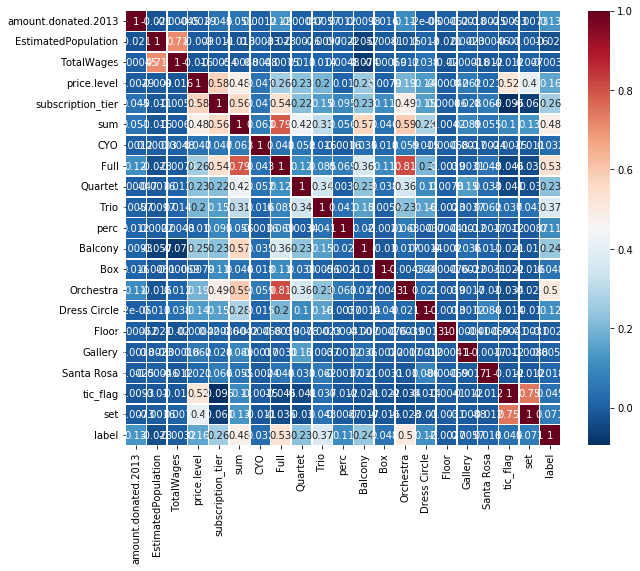

In [867]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
train_data = pd.concat([X_train,y_train],axis=1)
cm = train_data.corr(method='pearson')
sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

# Generate reults

In [915]:
test_full = pd.merge(test,df1, how='left',left_on='ID', right_on='account.id')
test_full = pd.merge(test_full,df2, how='left',left_on='account.id', right_on='account.id')

In [916]:
test_full['TaxReturnsFiled'] = test_full['TaxReturnsFiled'].fillna(test_full['TaxReturnsFiled'].median())
test_full['TotalWages'] = test_full['TotalWages'].fillna(test_full['TotalWages'].median())
test_full['EstimatedPopulation'] = test_full['EstimatedPopulation'].fillna(test_full['EstimatedPopulation'].median())

In [917]:
scaler(test_full,['TaxReturnsFiled','TotalWages','EstimatedPopulation','amount.donated.2013'])

In [918]:
cols = [
       'amount.donated.2013', 
       'EstimatedPopulation', 'price.level', 'subscription_tier',
        'sum',  'CYO', 'Full', 'Quartet', 'Trio', 'perc',
       'Balcony', 'Box', 'Orchestra', 'Dress Circle', 'Floor', 'Gallery',
       'Santa Rosa', 'tic_flag', 'set']

In [919]:
test_full = test_full[cols]
test_full.fillna(0,inplace=True)

In [900]:
X_train.columns

Index(['amount.donated.2013', 'EstimatedPopulation', 'price.level',
       'subscription_tier', 'sum', 'CYO', 'Full', 'Quartet', 'Trio', 'perc',
       'Balcony', 'Box', 'Orchestra', 'Dress Circle', 'Santa Rosa', 'tic_flag',
       'set'],
      dtype='object')

In [901]:
test_full.columns

Index(['amount.donated.2013', 'EstimatedPopulation', 'price.level',
       'subscription_tier', 'sum', 'CYO', 'Full', 'Quartet', 'Trio', 'perc',
       'Balcony', 'Box', 'Orchestra', 'Dress Circle', 'Floor', 'Gallery',
       'Santa Rosa', 'tic_flag', 'set'],
      dtype='object')

In [920]:
preds = opt_rf_model.predict_proba(test_full)[:, 1]

In [921]:
pd.DataFrame(X_train.columns).to_csv("feature_list.csv", index = None)


submission = pd.DataFrame({'ID':test['ID'], 'Predicted':preds})
submission.to_csv('test.csv', index=False)